# PCA wine ggplot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#importation des données
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/wine.txt"
wine = pd.read_table(url,sep="\t")

In [3]:
from scientisttools.decomposition import PCA
res_pca = PCA(standardize=True,n_components=5,quanti_sup=[29,30],quali_sup=[0,1],parallelize=True)
res_pca.fit(wine)

PCA(parallelize=True, quali_sup=[0, 1], quanti_sup=[29, 30])

## Eigenvalues

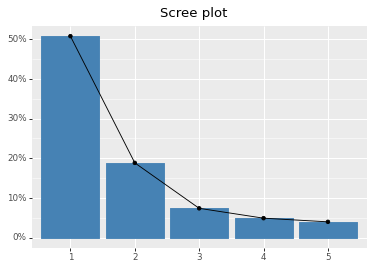

In [4]:
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(res_pca)
print(p)

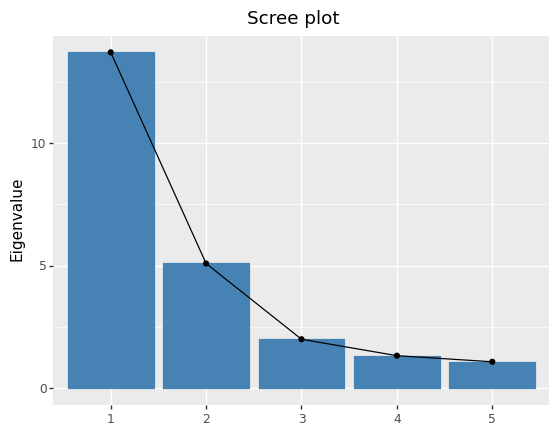

In [5]:
p = fviz_screeplot(res_pca,choice="eigenvalue")
print(p)

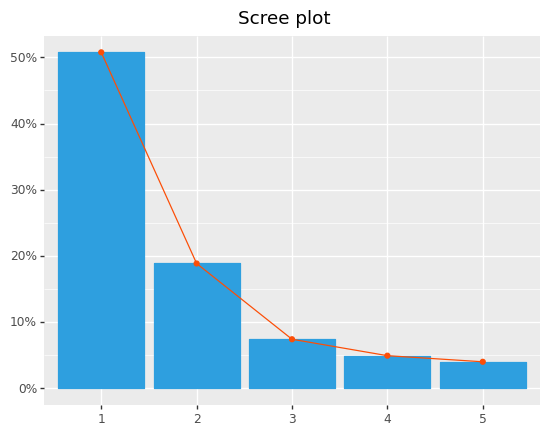

In [6]:
p = fviz_screeplot(res_pca,line_color = "#FC4E07",bar_color = "#2E9FDF", bar_fill = "#2E9FDF")
print(p)

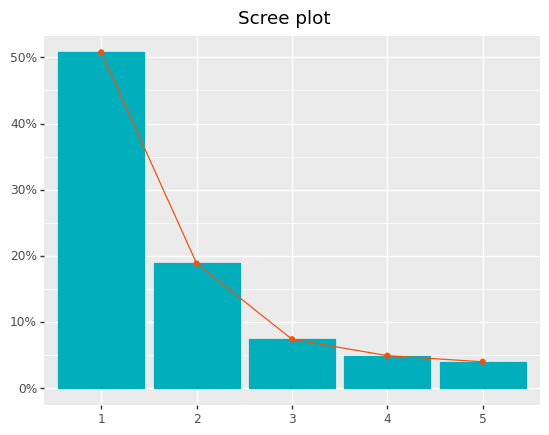

In [7]:
p = fviz_screeplot(res_pca,line_color = "#FC4E07",bar_color = "#00AFBB", bar_fill = "#00AFBB")
print(p)

## Individuals plots

### Color by RGB colors

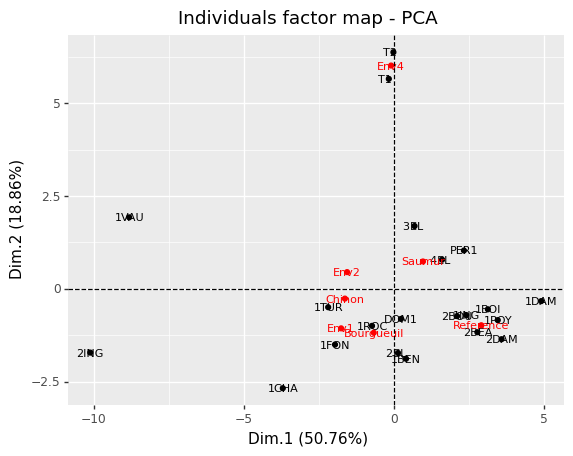

In [8]:
from scientisttools.ggplot import fviz_pca_ind
p = fviz_pca_ind(res_pca,repel=False)
print(p)

### Color by cos2

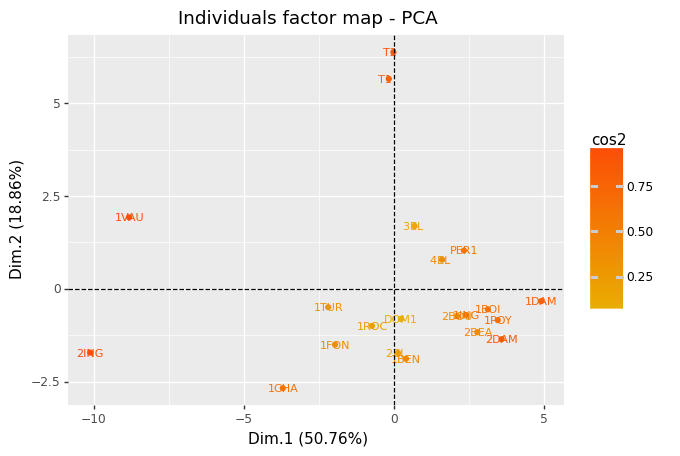

In [9]:
# Color by Cos2
p = fviz_pca_ind(res_pca,color="cos2",quali_sup=False)
print(p)

### Color by contrib

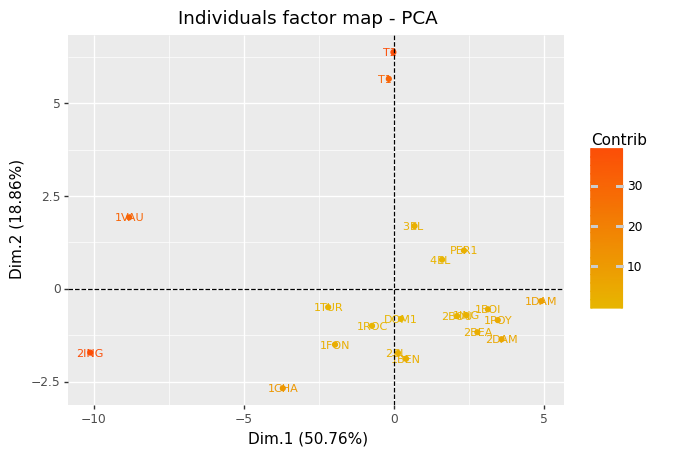

In [10]:
# Color by Cos2
p = fviz_pca_ind(res_pca,color="contrib",quali_sup=False)
print(p)

### Color by continuous variables

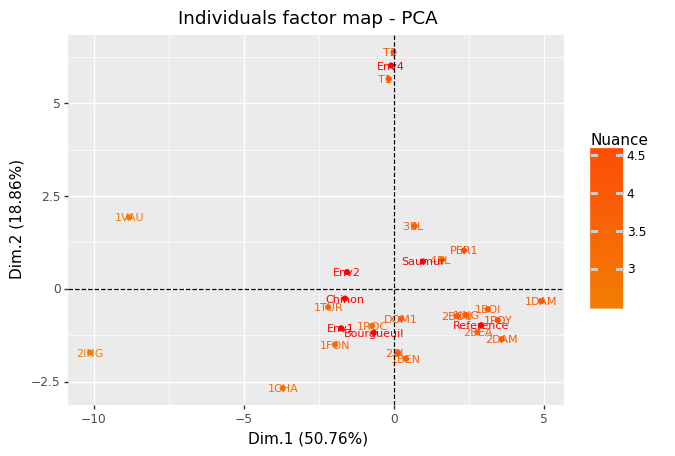

In [11]:
p = fviz_pca_ind(res_pca,color="Nuance")
print(p)

# Color by numpy array

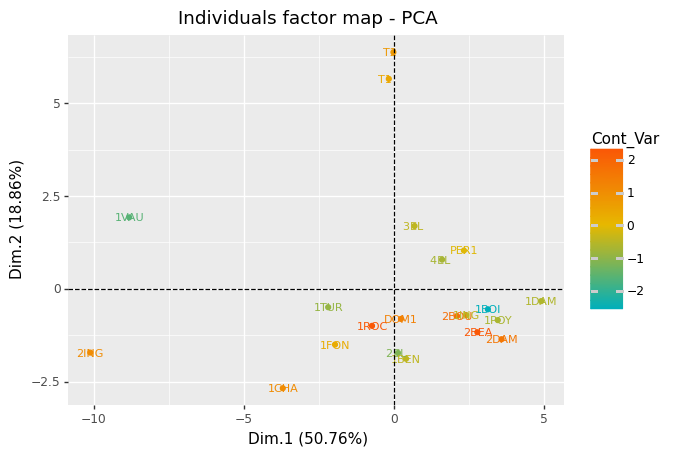

In [12]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=wine.shape[0])
p = fviz_pca_ind(res_pca,color=color_numpy,quali_sup=False)
print(p)

### Color by kmeans

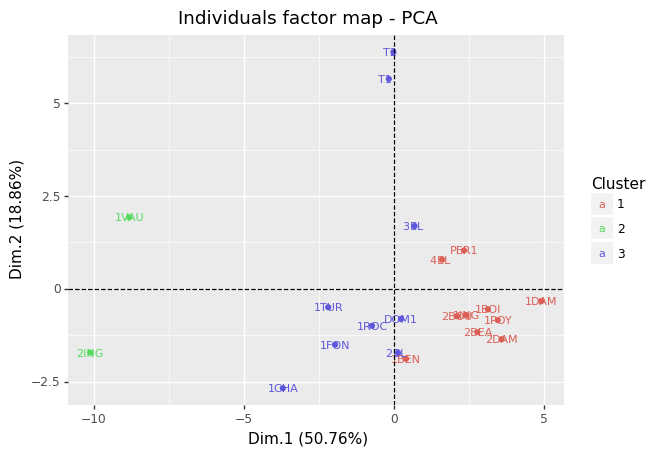

In [13]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.res_["ind"]["coord"])
p = fviz_pca_ind(res_pca,color=kmeans,repel=False,quali_sup=False)
print(p)

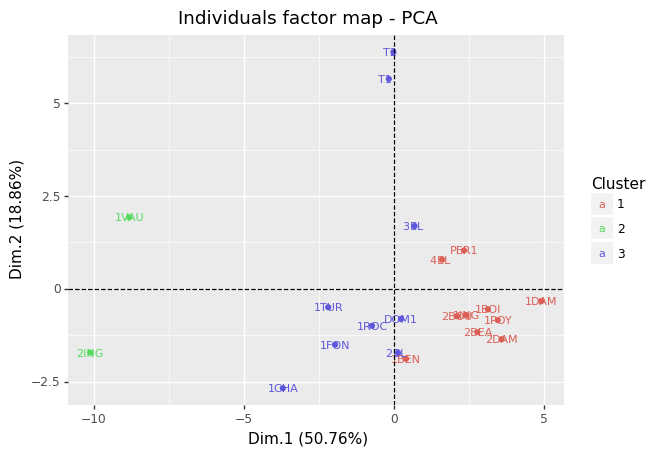

In [14]:
p = fviz_pca_ind(res_pca,color=kmeans,repel=False,quali_sup=False,add_ellipses=True)
print(p)

### Color by qualitatives variables

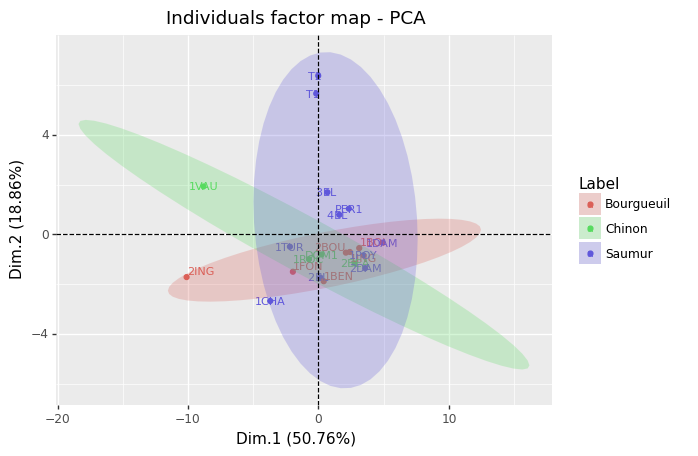

In [15]:
p = fviz_pca_ind(res_pca,quali_sup=False,habillage="Label",repel=True,add_ellipses=True)
print(p)

### Set limits

#### lim Cos2

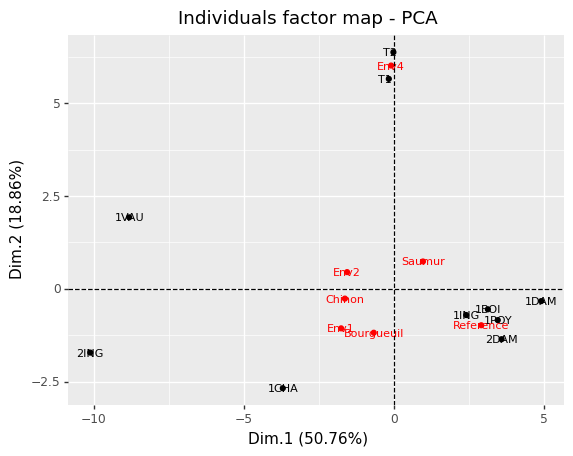

In [16]:
p = fviz_pca_ind(res_pca,repel=False,lim_cos2=0.6)
print(p)

#### lim contrib

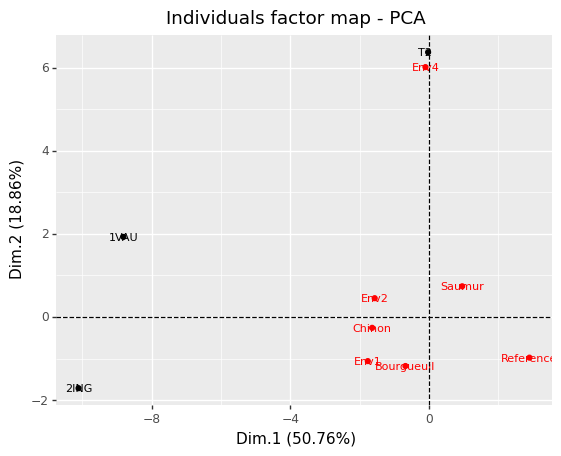

In [17]:
p = fviz_pca_ind(res_pca,repel=False,lim_contrib=30)
print(p)

## Variables

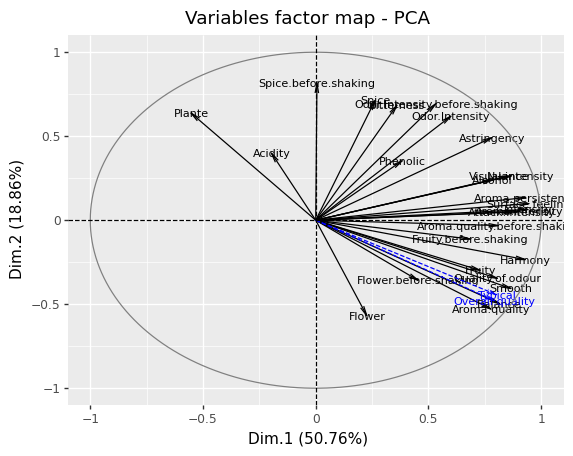

In [18]:
from scientisttools.ggplot import fviz_pca_var
p = fviz_pca_var(res_pca)
print(p)

## Color by cos2

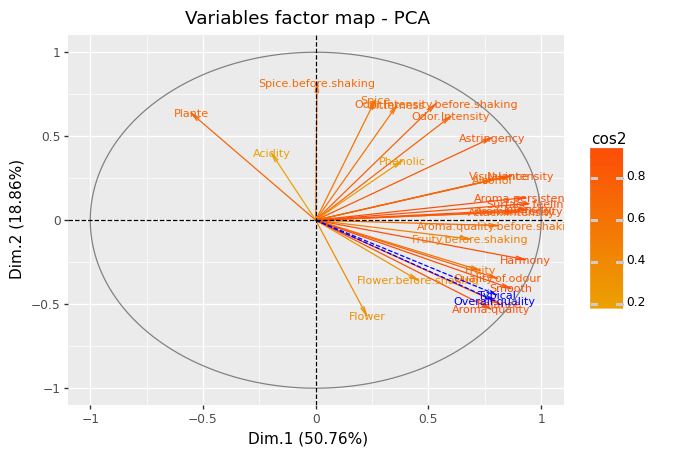

In [19]:
p = fviz_pca_var(res_pca,color="cos2")
print(p)

### Color by contrib

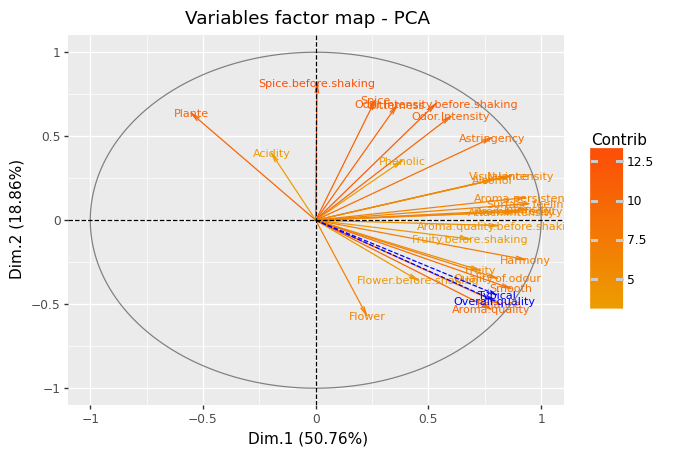

In [20]:
p = fviz_pca_var(res_pca,color="contrib")
print(p)

#### Color by numpy array

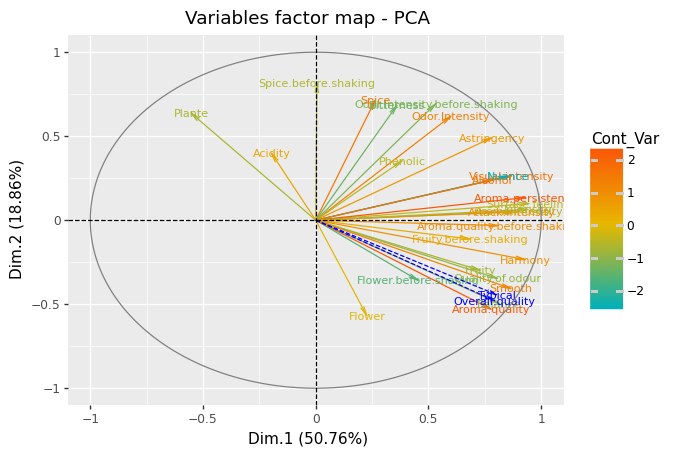

In [21]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_["X"].shape[1])
p = fviz_pca_var(res_pca,color=color_numpy)
print(p) 

### Colobr by kmeans

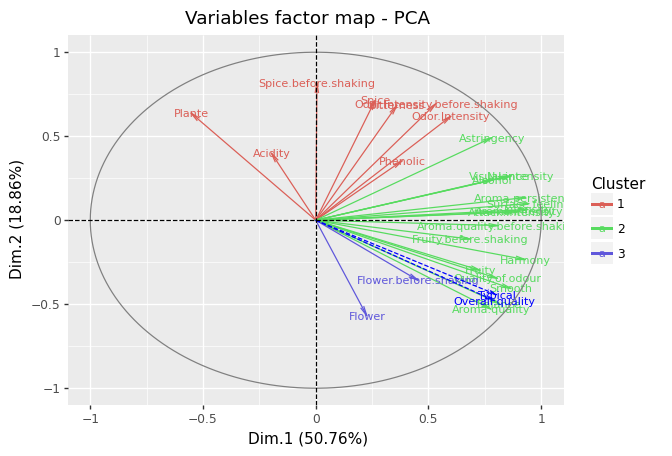

In [22]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.res_["var"]["coord"])
p = fviz_pca_var(res_pca,color=kmeans)
print(p)

### Set limits

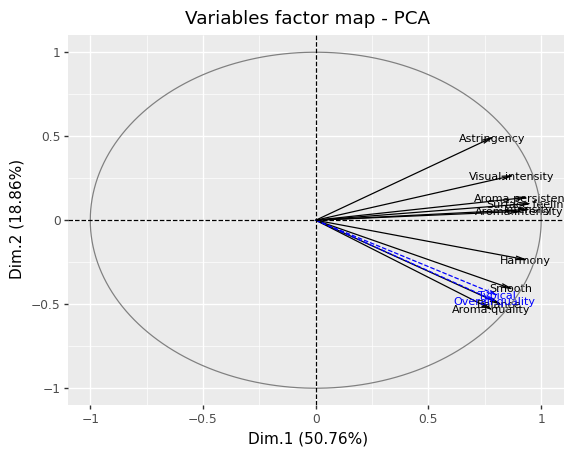

In [23]:
p = fviz_pca_var(res_pca,lim_cos2=0.8)
print(p) 

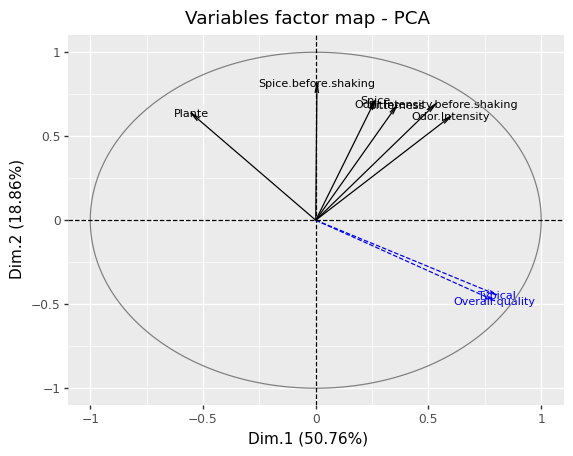

In [24]:
p = fviz_pca_var(res_pca,lim_contrib=10)
print(p) 